# Identitas

**Nama:** Farrel Augusta Dinata

**Kelas:** TI 3H

**NIM:** 2341720081

**No. Absen:** 12

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [ ]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [91]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [92]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [93]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
# Data Size
df.shape

(48842, 15)

In [95]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



**Jawab:**

In [96]:
# Jawaban soal 1
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [98]:
null_data_raw = df.isnull().sum()
null_data_raw

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [99]:
null_data = null_data_raw[null_data_raw > 0]
null_data

workclass         963
occupation        966
native-country    274
dtype: int64

In [100]:
print(f'2. Variabel yang memiliki nilai hilang adalah {", ".join(map(str, null_data.index))} dan jumlahnya adalah {null_data.sum()}')

2. Variabel yang memiliki nilai hilang adalah workclass, occupation, native-country dan jumlahnya adalah 2203


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

**Jawab:**

In [101]:
# 1.
# melakukan data imputation dengan menggunakan cara mengisi dengan nilai terbanyak (modus)
for col in null_data.index:
    if df[col].dtype in ['int64', 'float64']:   # data numerik
        df[col].fillna(df[col].mean(), inplace=True)
    else:  # data kategorikal
        df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\KarlSchmidt\AppData\Local\Temp\ipykernel_22072\3815826353.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [102]:
# pengecekan data
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Terlihat bahwa sudah tidak ada data yang memiliki nilai kosong yang ditunjukkan dari output yang ditampilkan berupa angka 0 semua.

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [103]:
non_numeric_cols = df.select_dtypes(exclude=['number'])
non_numeric_cols

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K.
48838,Private,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,United-States,<=50K.
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K.


Berdasarkan pengmatan yang ada, berikut ketidaksesuian data yang ada:
- Kolom `workclass` memiliki nilai `?`
- Kolom `native-country` memiliki nilai `?`
- Kolom `occupation` memiliki nilai `?`

In [104]:
mask = (df == "?").any(axis=1)

rows_with_question = df[mask]
rows_with_question

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Mengubah nilai `?` menjadi `Others`

In [105]:
df = df.replace("?", "Others")

mask = (df == "?").any(axis=1)

rows_with_question = df[mask]
rows_with_question

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


Dari hasil tersebut, sudah ditemukan lagi data yang bernilai `?`

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

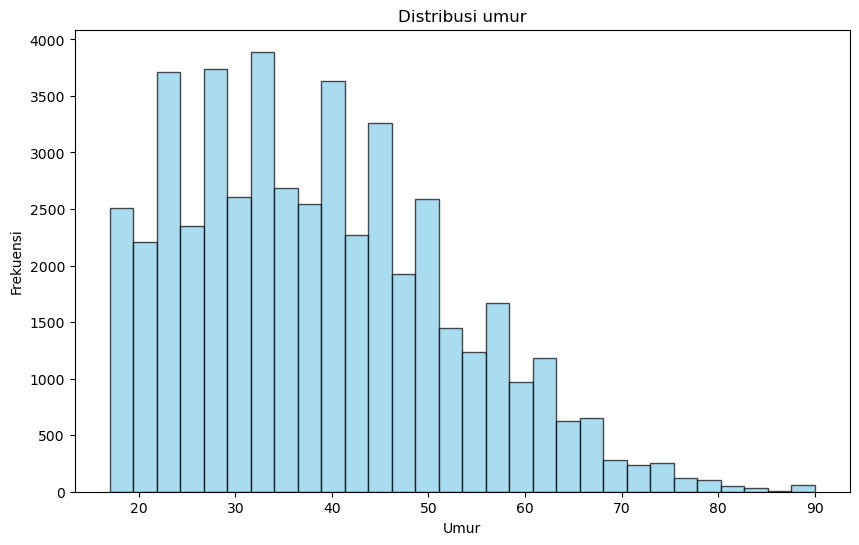

In [106]:
# Jawab 1.1 - Histogram
plt.figure(figsize=(10, 6))
plt.hist(
    x=df['age'], 
    bins=30, 
    color='skyblue', 
    alpha=0.7, 
    edgecolor='black'
)
plt.title('Distribusi umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

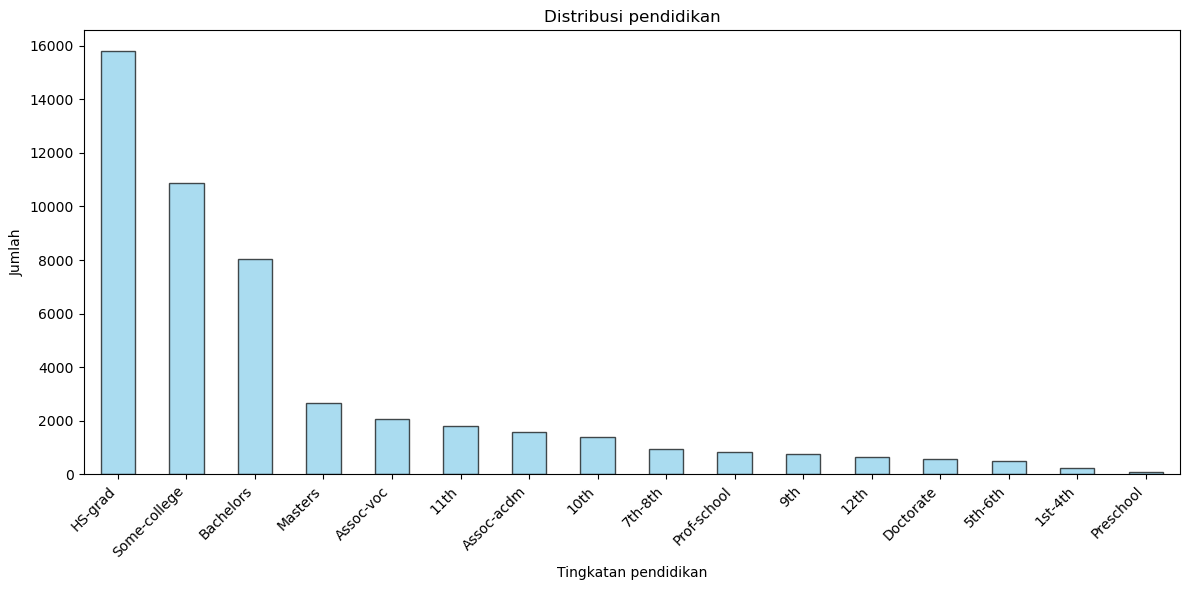

In [107]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(12, 6))
education_counts = df['education'].value_counts()
education_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Distribusi pendidikan')
plt.xlabel('Tingkatan pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\KarlSchmidt\AppData\Local\Temp\ipykernel_22072\1080401757.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(hours_data, labels=income_categories)


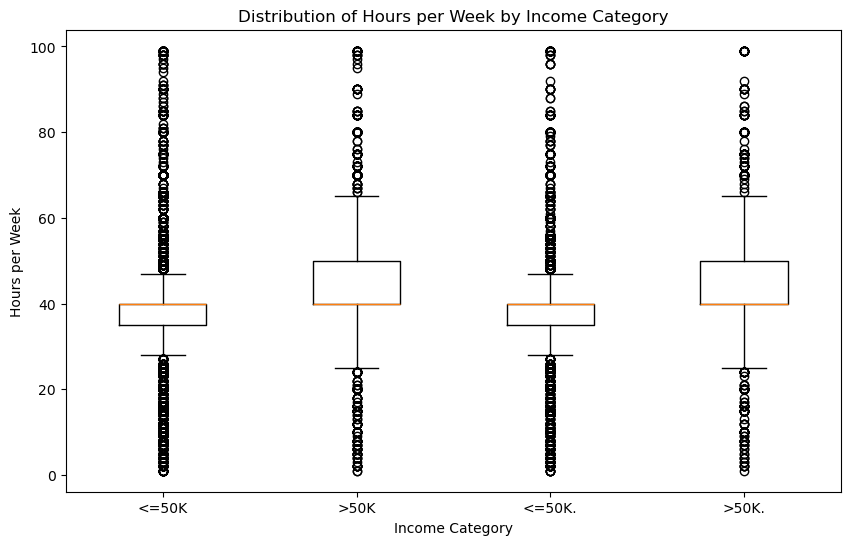

In [108]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10, 6))
income_categories = df['income'].unique()
hours_data = [df[df['income'] == cat]['hours-per-week'] for cat in income_categories]

plt.boxplot(hours_data, labels=income_categories)
plt.title('Distribution of Hours per Week by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.show()

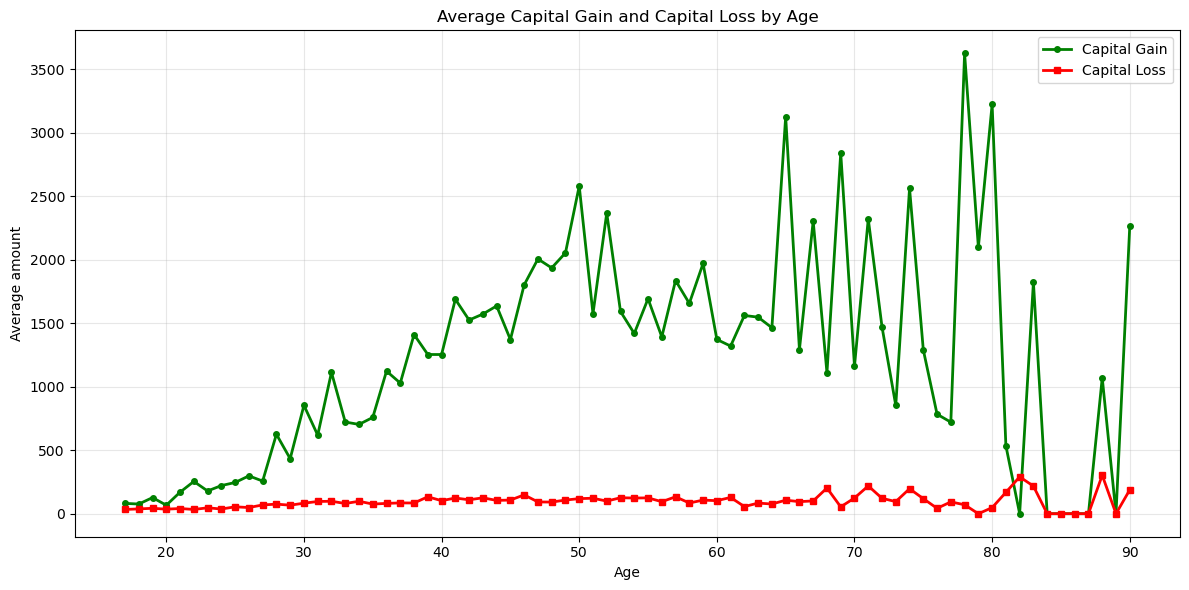

In [109]:
# Jawab 1.4 - Lineplot
plt.figure(figsize=(12, 6))

# Group data by age and calculate mean values
age_grouped = df.groupby('age').agg({
    'capital-gain': 'mean',
    'capital-loss': 'mean'
}).reset_index()

# Create lineplot with both capital-gain and capital-loss
plt.plot(
    age_grouped['age'], 
    age_grouped['capital-gain'], 
    label='Capital Gain', 
    color='green', 
    linewidth=2, 
    marker='o', 
    markersize=4
)
plt.plot(
    age_grouped['age'], 
    age_grouped['capital-loss'], 
    label='Capital Loss', 
    color='red', 
    linewidth=2, 
    marker='s', 
    markersize=4
)

plt.title('Average Capital Gain and Capital Loss by Age')
plt.xlabel('Age')
plt.ylabel('Average amount')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [110]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [111]:
df['capital-loss'].describe()

count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [112]:
outlier_analysis = []
for category in df['income'].unique():
    subset = df[df['income'] == category]['hours-per-week']
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    outlier_analysis.append({
        'Income Category': category,
        'Total Count': len(subset),
        'Outlier Count': len(outliers),
        'Outlier Percentage': (len(outliers) / len(subset)) * 100,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_analysis)
outlier_df

,Income Category,Total Count,Outlier Count,Outlier Percentage,Q1,Q3,IQR,Lower Bound,Upper Bound
0,<=50K,24720,7809,31.589806,35.0,40.0,5.0,27.5,47.5
1,>50K,7841,510,6.504272,40.0,50.0,10.0,25.0,65.0
2,<=50K.,12435,3897,31.338963,35.0,40.0,5.0,27.5,47.5
3,>50K.,3846,271,7.046282,40.0,50.0,10.0,25.0,65.0


In [113]:
# Jawab dengan komentar python

'''
1. Pada data yang ditampilkan melalui visualisasi data `age` terlihat bahwa nilai capital gain cenderung fluktuatif seiring bertambahnya umur. Namun, nilai capital gain cenderung naik pada umur 17 hingga sekitar 50 an tahun. Namun, untuk umur setelahnya, nilai capital gain cenderung menurun meski terkadang terdapat beberapa kemungkinan ada lonjakan naikan capital gain.

Sedangkan nilai `capital-loss` untuk seluruh umur cenderung konsisten tidak terlalu banyak berubah


2. Menggunakan data-data yang berkaitan dengan data capital-gain karena nilai capital gain pada usia tertentu cenderung memiliki pola yang sama. Contohnya, pada manusia yang berumur 30 an, seharusnya dia memiliki nilai capital gain sekitar 1000

3. Berdasarkan perhitungan yang ada pada cell 35, semua data memiliki outlier. Dengan kategori `<=50K` yang menjadi kategori dengan nilai outlier tertinggi sebanyak 2.4720
'''

'\n1. Pada data yang ditampilkan melalui visualisasi data `age` terlihat bahwa nilai capital gain cenderung fluktuatif seiring bertambahnya umur. Namun, nilai capital gain cenderung naik pada umur 17 hingga sekitar 50 an tahun. Namun, untuk umur setelahnya, nilai capital gain cenderung menurun meski terkadang terdapat beberapa kemungkinan ada lonjakan naikan capital gain.\n\nSedangkan nilai `capital-loss` untuk seluruh umur cenderung konsisten tidak terlalu banyak berubah\n\n\n2. Menggunakan data-data yang berkaitan dengan data capital-gain karena nilai capital gain pada usia tertentu cenderung memiliki pola yang sama. Contohnya, pada manusia yang berumur 30 an, seharusnya dia memiliki nilai capital gain sekitar 1000\n\n3. Berdasarkan perhitungan yang ada pada cell 35, semua data memiliki outlier. Dengan kategori `<=50K` yang menjadi kategori dengan nilai outlier tertinggi sebanyak 2.4720\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

Preview data sex dan income sebelum di encoding

In [114]:
df[['sex', 'income']].head(10)

,sex,income
0,Male,<=50K
1,Male,<=50K
2,Male,<=50K
3,Male,<=50K
4,Female,<=50K
5,Female,<=50K
6,Female,<=50K
7,Male,>50K
8,Female,>50K
9,Male,>50K


In [115]:
df[['sex', 'income']].describe()

,sex,income
count,48842,48842
unique,2,4
top,Male,<=50K
freq,32650,24720


In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
le = LabelEncoder() 
df['sex'] = le.fit_transform(df['sex']) 
df['income'] = le.fit_transform(df['income'])

Preview hasil setelah di encoding

In [118]:
df[['sex', 'income']].head(10)

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,2
8,0,2
9,1,2


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [119]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
df_subset = df[cols]

df_subset.head(10)

,age,education-num,hours-per-week,capital-gain,capital-loss,income
0,39,13,40,2174,0,0
1,50,13,13,0,0,0
2,38,9,40,0,0,0
3,53,7,40,0,0,0
4,28,13,40,0,0,0
5,37,14,40,0,0,0
6,49,5,16,0,0,0
7,52,9,45,0,0,2
8,31,14,50,14084,0,2
9,42,13,40,5178,0,2


In [120]:
corr_matrix = df_subset.corr(method='pearson')
corr_matrix

,age,education-num,hours-per-week,capital-gain,capital-loss,income
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.205173
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.291074
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.198890
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.195755
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.129771
income,0.205173,0.291074,0.198890,0.195755,0.129771,1.000000


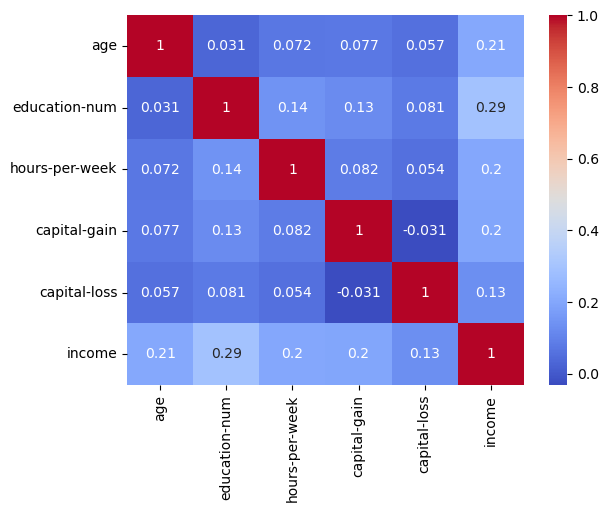

In [121]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [122]:
# Hasil analisis jelaskan pada cell ini

'''
Dari visualisasi heatmap tersebut, terdapat beberapa fitur yang berkorelasi cukup kuat seperti `education-num` dengan `income`. Nilai yang ditunjukkan adalah 0.29. Meski itu sebenarnya masih tergolong rendah karena jauh dari nilai positif 1 atau negatif 1. Namun, nilai itu cenderung yang paling tinggi daripada yang lain. 

Kemudian untuk perbandingan antara fitur yang kurang berkolerasi adalah `education-num` dengan `age`. Nilai yang diperoleh adalah `0.031`. Nilai tersebut sangat mendekati dengan nilai 0. Nilai yang semakin mendekati nilai 0, maka itu memiliki hubungan yang sangat lemah satu sama lain.
'''

'\nDari visualisasi heatmap tersebut, terdapat beberapa fitur yang berkorelasi cukup kuat seperti `education-num` dengan `income`. Nilai yang ditunjukkan adalah 0.29. Meski itu sebenarnya masih tergolong rendah karena jauh dari nilai positif 1 atau negatif 1. Namun, nilai itu cenderung yang paling tinggi daripada yang lain. \n\nKemudian untuk perbandingan antara fitur yang kurang berkolerasi adalah `education-num` dengan `age`. Nilai yang diperoleh adalah `0.031`. Nilai tersebut sangat mendekati dengan nilai 0. Nilai yang semakin mendekati nilai 0, maka itu memiliki hubungan yang sangat lemah satu sama lain.\n'

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [123]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_da.ta()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

ModuleNotFoundError: No module named 'tensorflow'

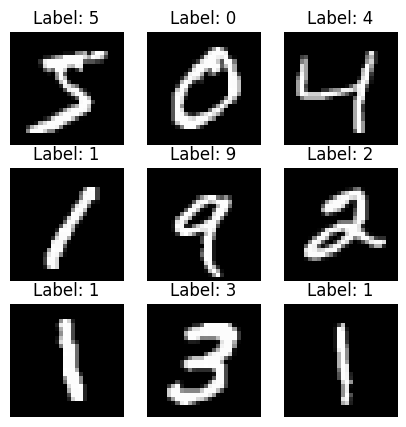

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

In [ ]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [ ]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [ ]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan